# Acc 1 Stock Performance Tracker


## Setup


In [1]:
import contextlib

import pandas as pd

import const
import draw_utils
import process_utils

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


In [3]:
acc_name = const.ACC1_NAME
user_name_l = const.ACC_USER_DICT[acc_name]
compare_index = const.VNI_NAME


## Prepare Dataframe


In [4]:
log_df, cf_df = process_utils.prepare_log_df_cf_df(
    acc_user_dict={
        acc_name_key: user_name_l
        for acc_name_key, user_name_l in const.ACC_USER_DICT.items()
        if acc_name_key == acc_name
    },
    acc_combined_name=None,
    index_name_l=[compare_index],
    index_combined_name=None,
)


In [5]:
user_df = process_utils.get_user_df(
    log_df,
    cf_df,
    acc_name=acc_name,
    user_name_l=user_name_l,
    index_name=compare_index,
)


## Charts


### NAV


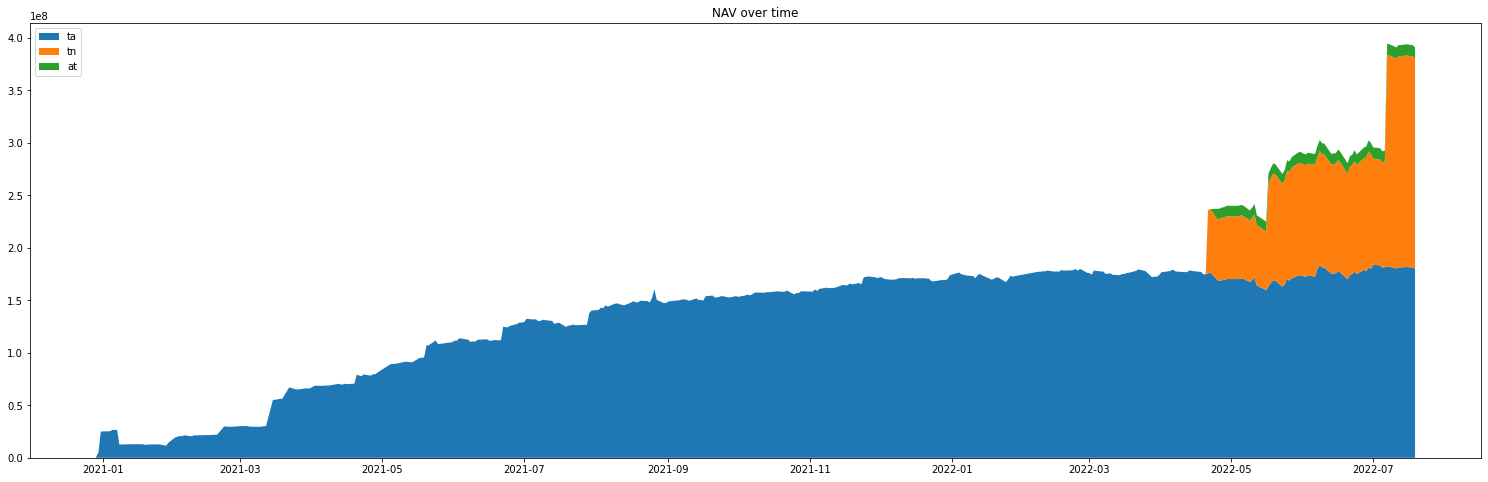

In [6]:
y_list = [user_df[user_name] for user_name in user_name_l]

draw_utils.plot_nav_stackplot(
    x=user_df.index,  # type: ignore
    y=y_list,
    labels=user_name_l,
)


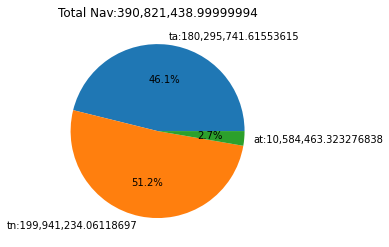

In [7]:
nav_l = [user_df[user_name].iloc[-1] for user_name in user_name_l]  # type: ignore
label_l = [f"{user_name}:{nav:,}" for user_name, nav in zip(user_name_l, nav_l)]
draw_utils.plot_nav_pie(nav_l, label_l=label_l)


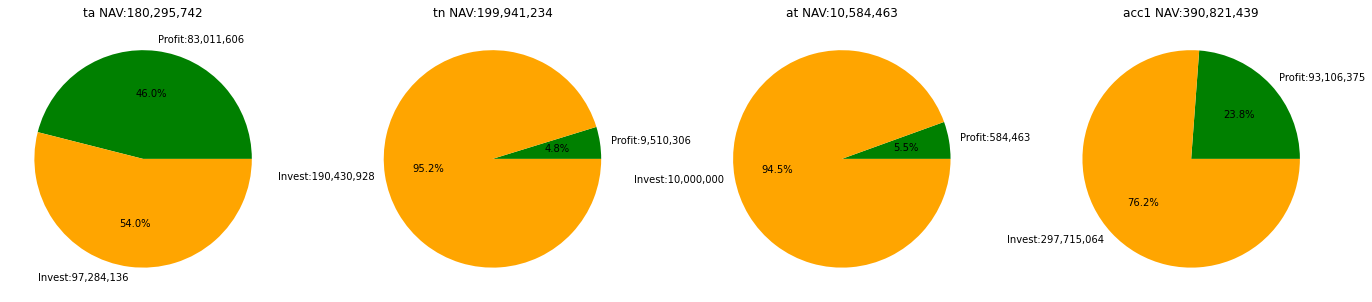

In [8]:
profit_invest_list: list[tuple[str, float, float]] = []
for name in user_name_l + [acc_name]:
    nav = user_df[name].iloc[-1]
    invest = -user_df[f"{name}_cf"].sum()
    profit = nav - invest
    profit_invest_list.append((name, profit, invest))
draw_utils.plot_profit_invest_pies(profit_invest_list)


### Recent


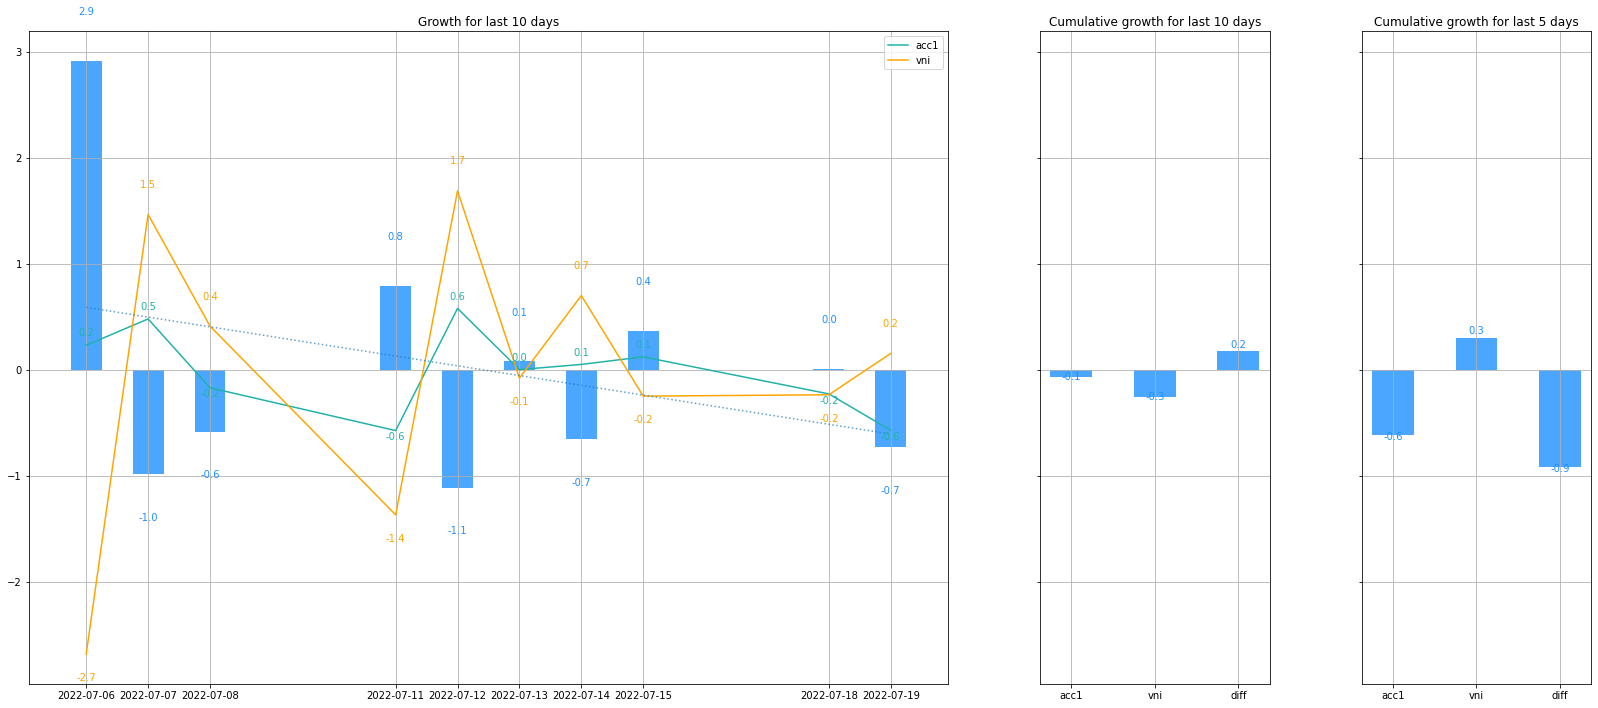

In [9]:
draw_utils.plot_recent_growth(
    user_df,
    num_days=10,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


In [10]:
# user_df.tail(10)


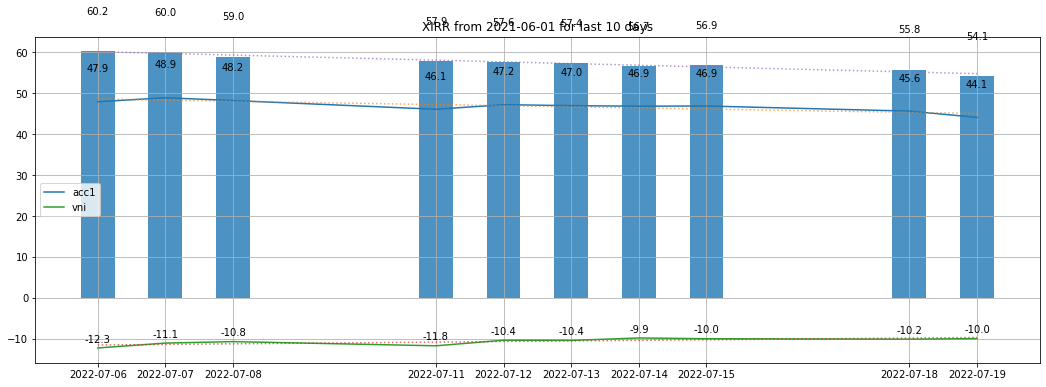

In [11]:
draw_utils.plot_recent_xirr(
    log_df=user_df,
    cf_df=cf_df,
    num_days=10,
    anchor_date="2021-06-01",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


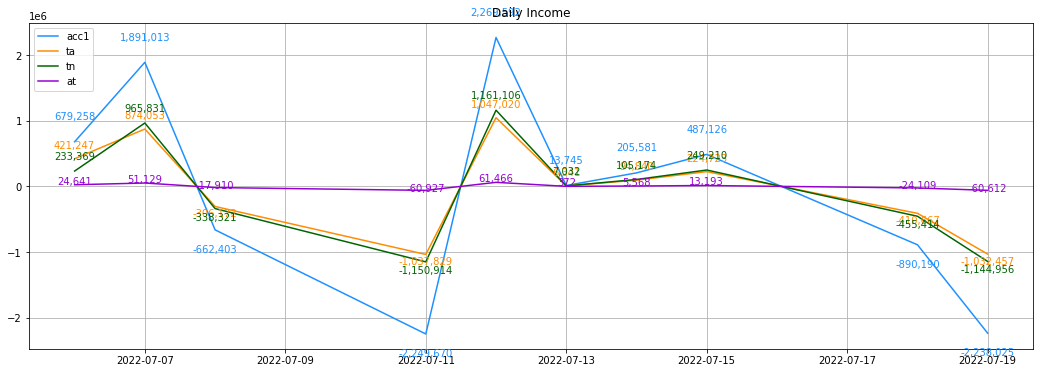

In [12]:
draw_utils.plot_recent_income(
    daily_df=user_df,
    num_days=10,
    name_l=[acc_name] + user_name_l,
)


### Diff distribution


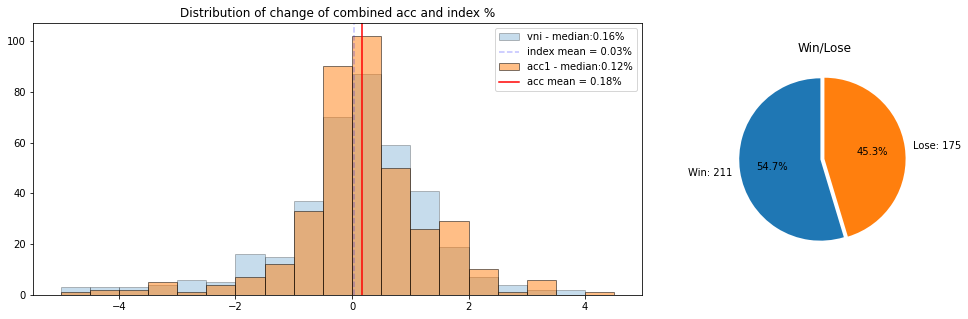

In [13]:
draw_utils.plot_daily_diff_p_distribution(
    user_df,
    acc_name=acc_name,
    index_name=compare_index,
)


### Growth XIRR


In [14]:
anchor_date = "2022-4-21"

growth_xirr_df = process_utils.get_overall_growth_xirr_df(
    user_df,
    cf_df,
    anchor_date=anchor_date,
    acc_name_l=[acc_name],
    index_name_l=[compare_index],
)


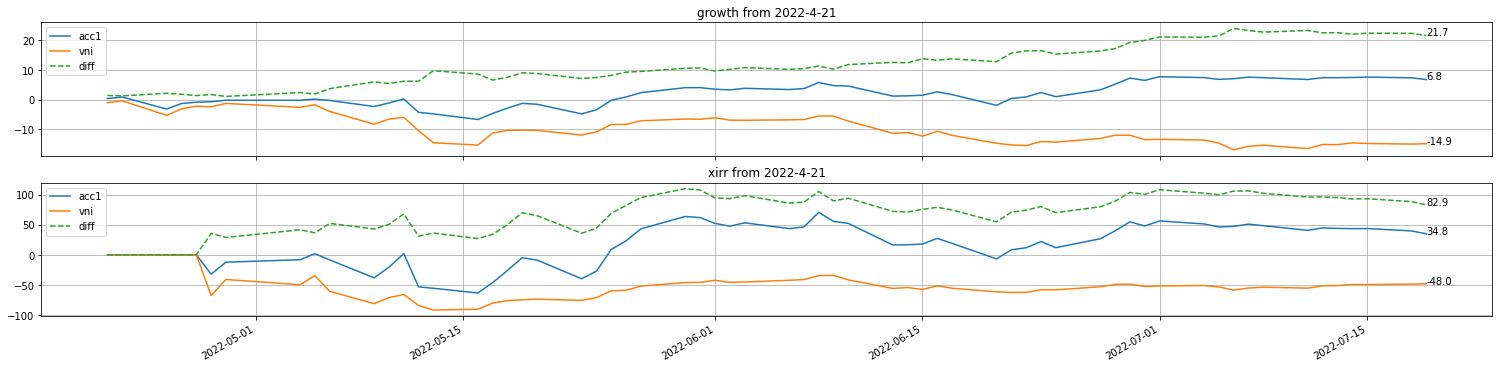

In [15]:
draw_utils.plot_growth_xirr_over_time(
    growth_xirr_df,
    anchor_date=anchor_date,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


### Periodic


In [16]:
periodic_user_df = process_utils.add_period_cols(user_df)


#### Weekly


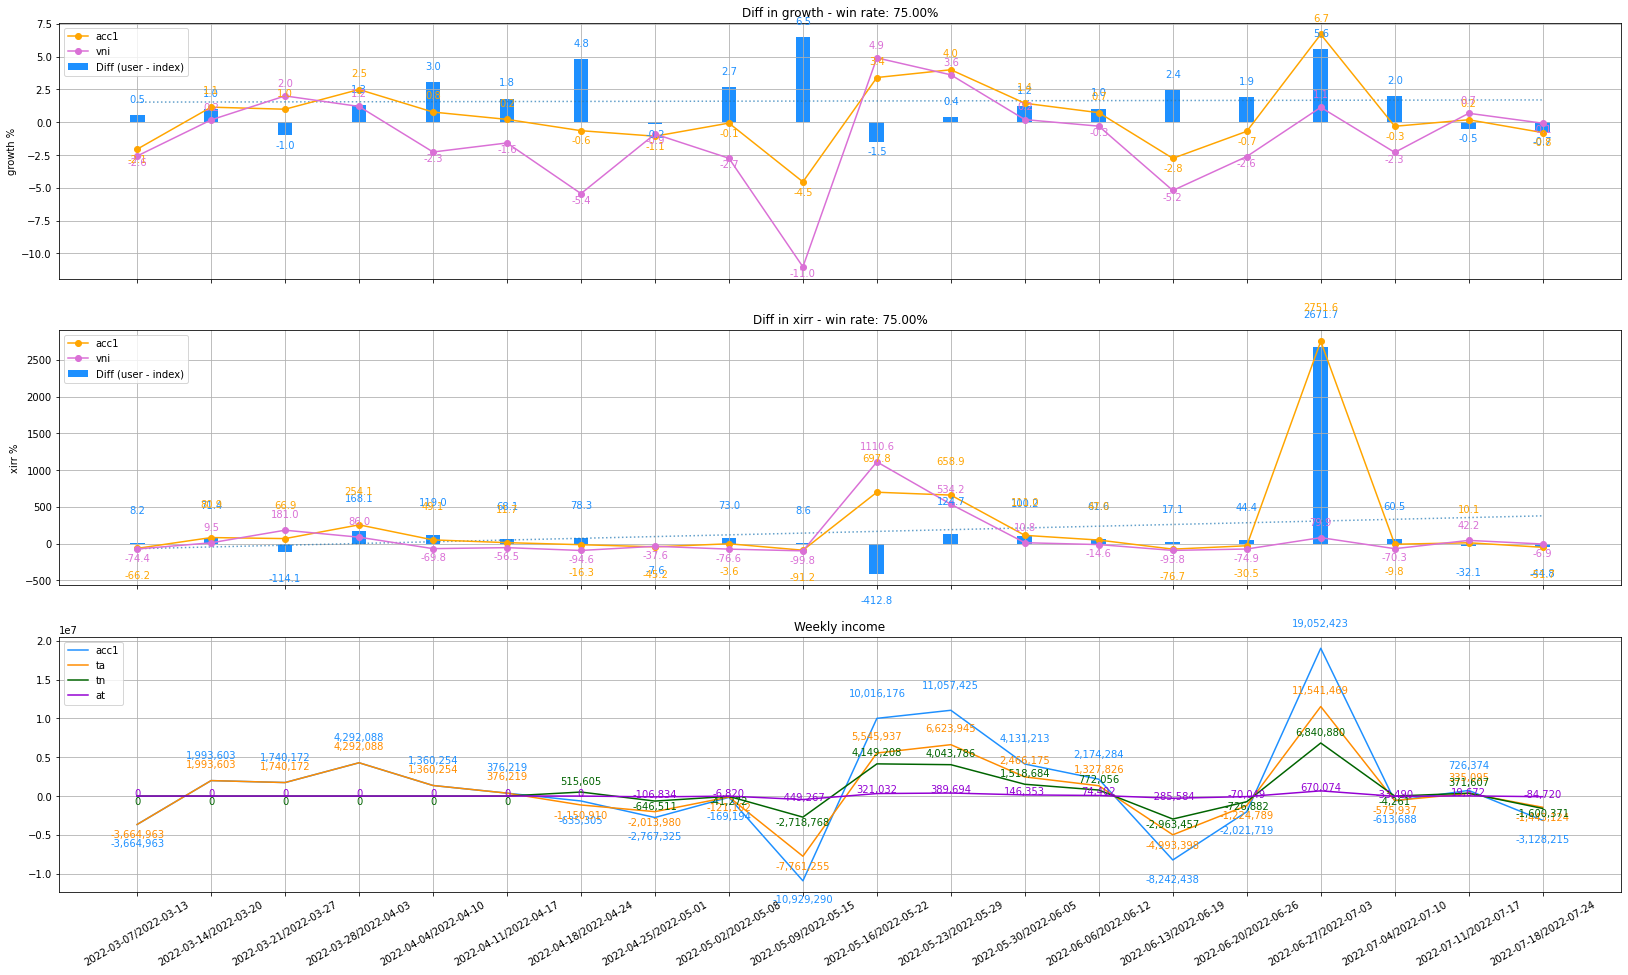

In [17]:
weekly_df = process_utils.get_period_df(
    period_symbol="W",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)
# Not enough space to plot every week
weekly_df = process_utils.filter_latest_x_rows(df=weekly_df, row_num=20)  # type: ignore

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=weekly_df,
    period_name="Weekly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Monthly


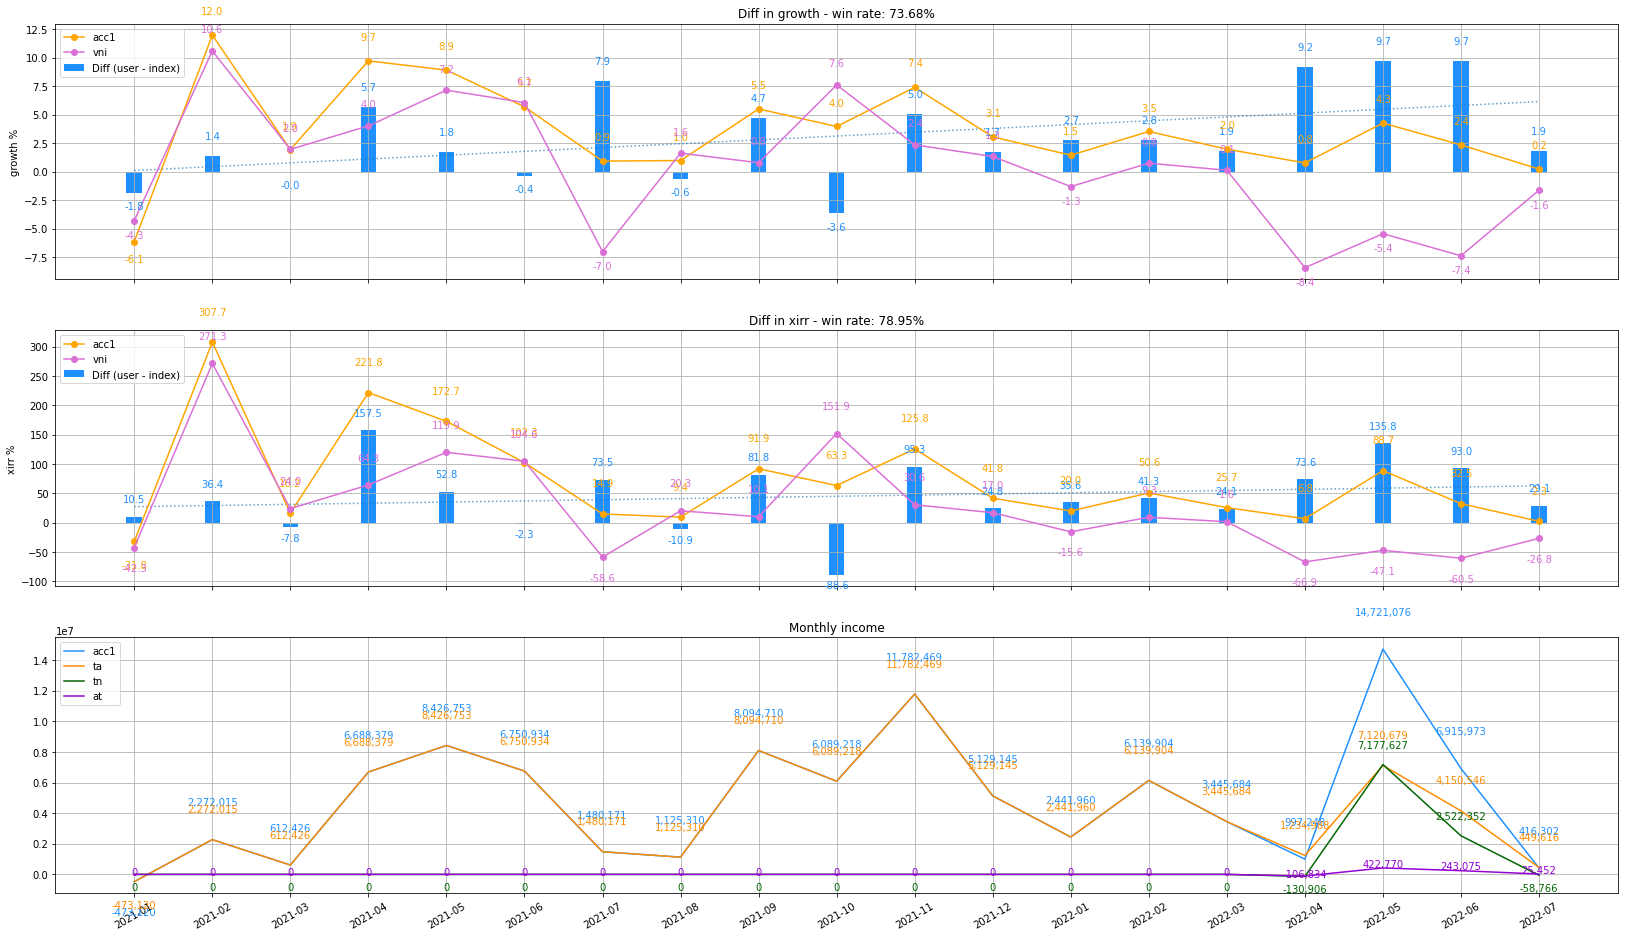

In [18]:
monthly_df = process_utils.get_period_df(
    period_symbol="M",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020-12
    monthly_df.drop(["2020-12"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=monthly_df,
    period_name="Monthly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Quarterly


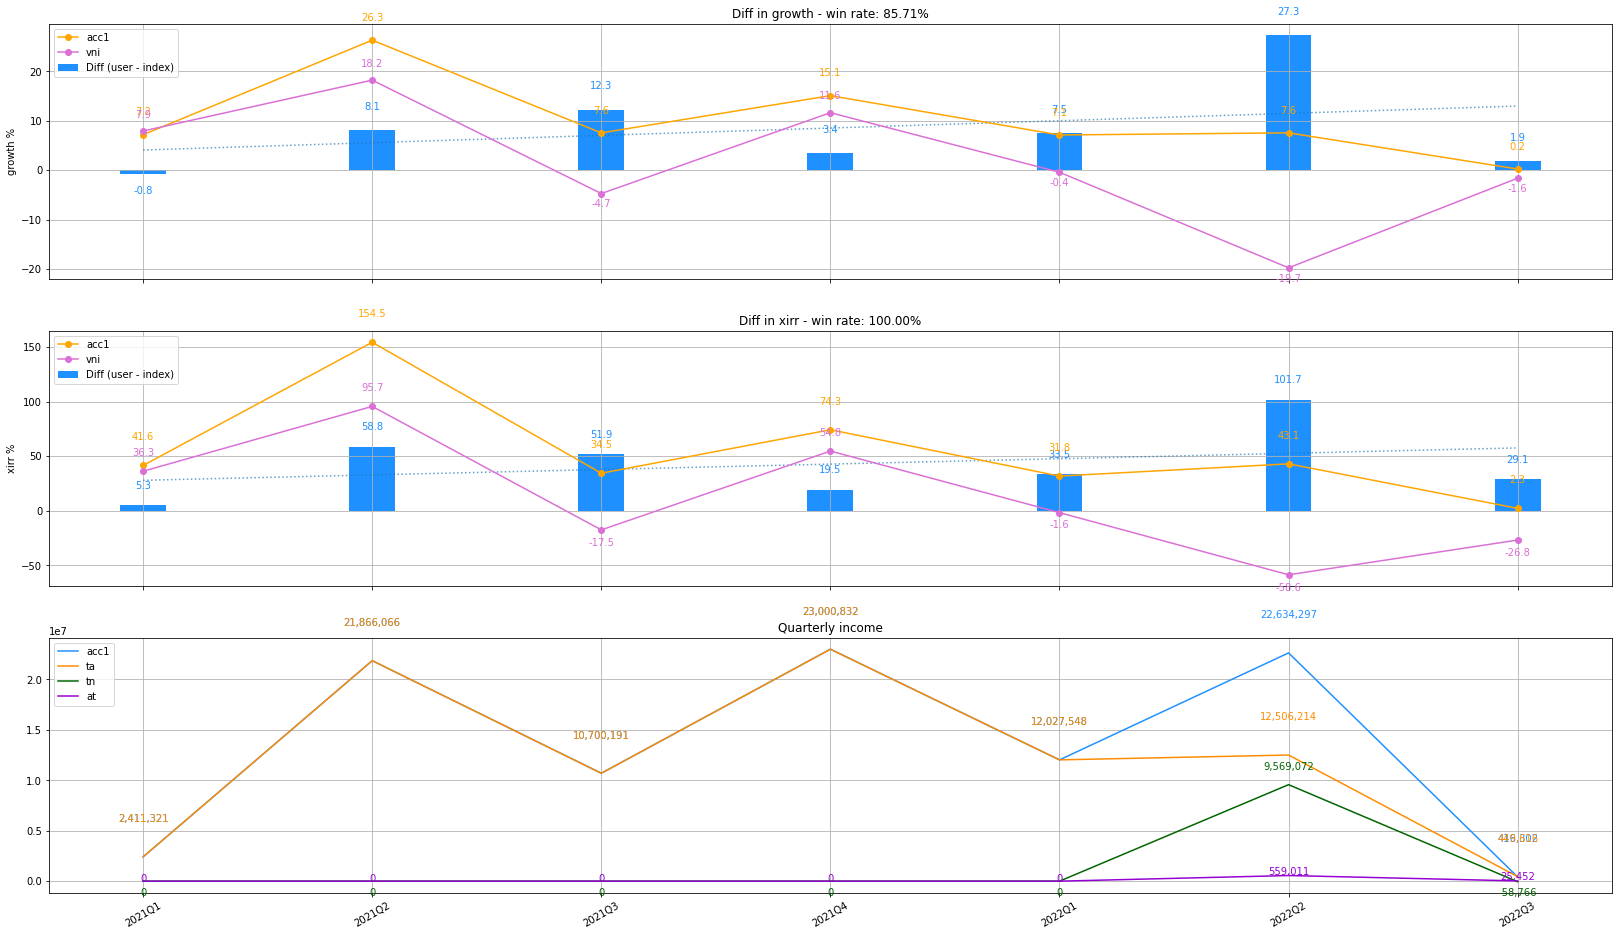

In [19]:
quaterly_df = process_utils.get_period_df(
    period_symbol="Q",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020Q4
    quaterly_df.drop(["2020Q4"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=quaterly_df,
    period_name="Quarterly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Yearly


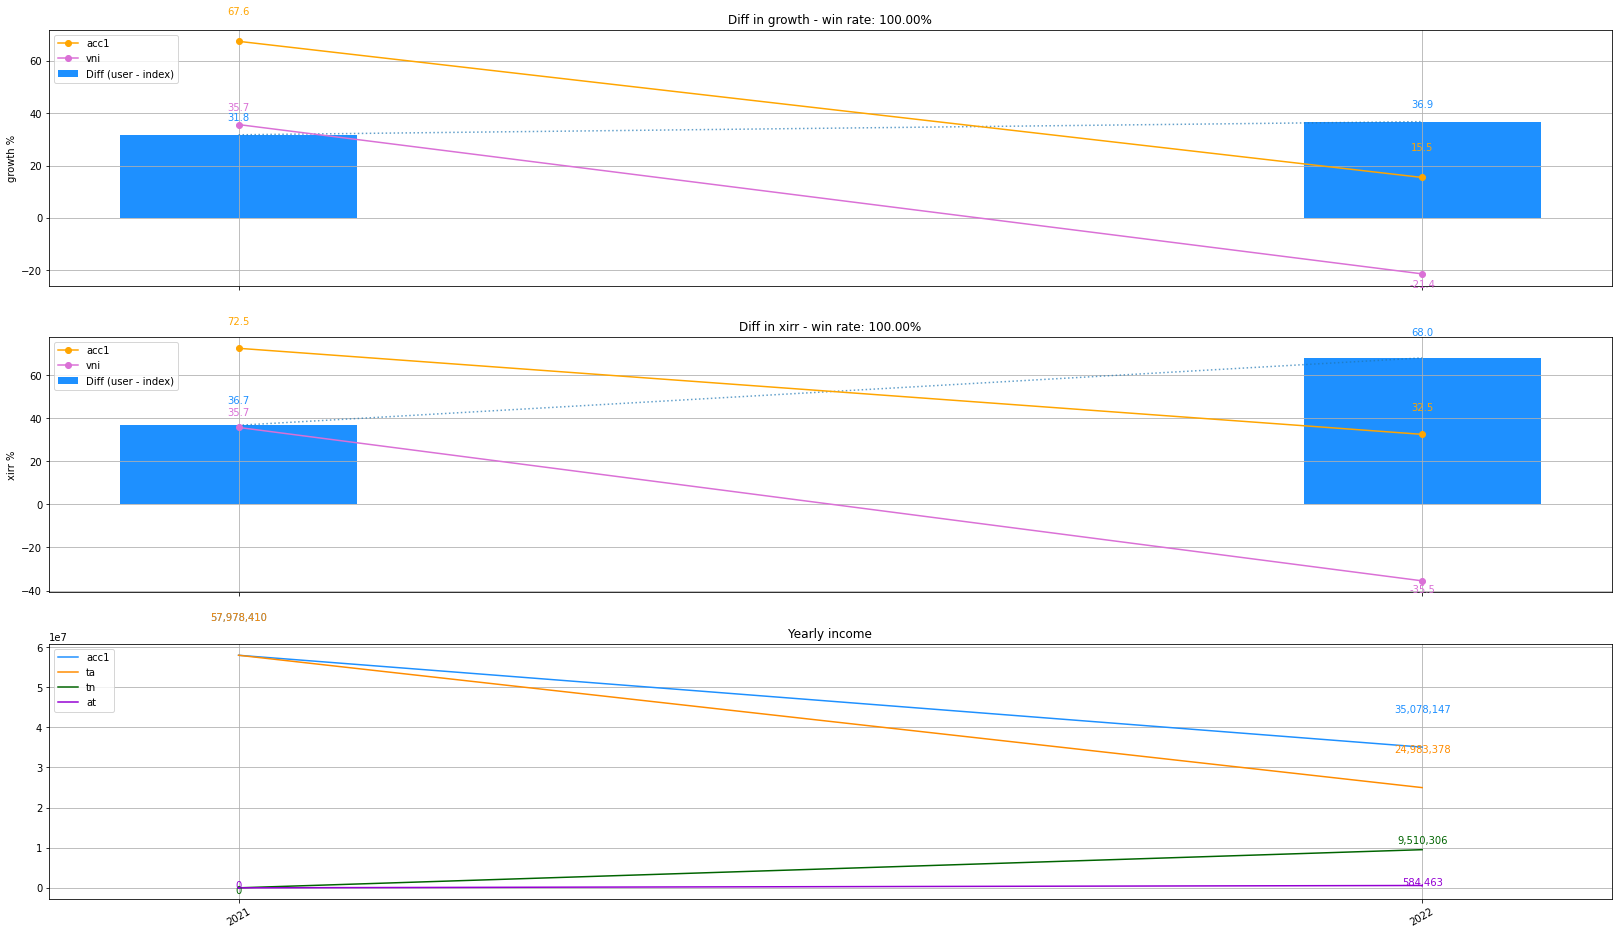

In [20]:
yearly_df = process_utils.get_period_df(
    period_symbol="Y",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020
    yearly_df.drop(["2020"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=yearly_df,
    period_name="Yearly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


## Fee


In [21]:
processing_user_name = const.TN_USER_NAME
user_fee_p = const.USER_NAME_FEE_DICT[processing_user_name]
user_fee_anchor_date = const.USER_NAME_FEE_ANCHOR_DATE[processing_user_name]


In [22]:
user_df.tail()


,vni,vni_diff,acc1,acc1_diff,ta_cf,tn_cf,at_cf,acc1_cf,day_start,ta_day_start,ta_share,ta_diff,ta,tn_day_start,tn_share,tn_diff,tn,at_day_start,at_share,at_diff,at,acc1_diff_p,acc1_aux_diff_p,ta_diff_p,ta_aux_diff_p,tn_diff_p,tn_aux_diff_p,at_diff_p,at_aux_diff_p,vni_diff_p,vni_aux_diff_p
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-13,1173.92,-0.90,393256947,13745.0,0.0,0.0,0.0,0.0,393243202.0,1.814130e+08,0.461325,6.340914e+03,1.814193e+08,2.011802e+08,0.511592,7.031836e+03,2.011872e+08,1.065005e+07,0.027083,372.250429,1.065042e+07,0.000035,1.000035,0.000035,1.000035,0.000035,1.000035,0.000035,1.000035,-0.000766,0.999234
2022-07-14,1182.17,8.25,393462528,205581.0,0.0,0.0,0.0,0.0,393256947.0,1.814193e+08,0.461325,9.483968e+04,1.815141e+08,2.011872e+08,0.511592,1.051737e+05,2.012924e+08,1.065042e+07,0.027083,5567.669368,1.065599e+07,0.000523,1.000523,0.000523,1.000523,0.000523,1.000523,0.000523,1.000523,0.007028,1.007028
2022-07-15,1179.25,-2.92,393949654,487126.0,0.0,0.0,0.0,0.0,393462528.0,1.815141e+08,0.461325,2.247235e+05,1.817389e+08,2.012924e+08,0.511592,2.492099e+05,2.015416e+08,1.065599e+07,0.027083,13192.641872,1.066918e+07,0.001238,1.001238,0.001238,1.001238,0.001238,1.001238,0.001238,1.001238,-0.002470,0.997530
2022-07-18,1176.49,-2.76,393059464,-890190.0,0.0,0.0,0.0,0.0,393949654.0,1.817389e+08,0.461325,-4.106670e+05,1.813282e+08,2.015416e+08,0.511592,-4.554143e+05,2.010862e+08,1.066918e+07,0.027083,-24108.665660,1.064507e+07,-0.002260,0.997740,-0.002260,0.997740,-0.002260,0.997740,-0.002260,0.997740,-0.002340,0.997660
2022-07-19,1178.33,1.84,390821439,-2238025.0,0.0,0.0,0.0,0.0,393059464.0,1.813282e+08,0.461325,-1.032457e+06,1.802957e+08,2.010862e+08,0.511592,-1.144956e+06,1.999412e+08,1.064507e+07,0.027083,-60611.550865,1.058446e+07,-0.005694,0.994306,-0.005694,0.994306,-0.005694,0.994306,-0.005694,0.994306,0.001564,1.001564


In [23]:
relevant_columns = [
    f"{compare_index}",
    f"{compare_index}_diff_p",
    processing_user_name,
    f"{processing_user_name}_day_start",
    f"{processing_user_name}_diff",
    f"{processing_user_name}_diff_p",
]

fee_df = user_df[relevant_columns]
fee_df = fee_df[fee_df.index >= user_fee_anchor_date]  # type: ignore


fee_df[f"{processing_user_name}_outperf_p"] = (
    fee_df[f"{processing_user_name}_diff_p"] - fee_df[f"{compare_index}_diff_p"]
)
fee_df[f"{processing_user_name}_outperf"] = (
    fee_df[f"{processing_user_name}_day_start"]
    * fee_df[f"{processing_user_name}_outperf_p"]
)
fee_df[f"{processing_user_name}_outperf_fee"] = (
    fee_df[f"{processing_user_name}_outperf"] * user_fee_p
)

fee_df.tail()


,vni,vni_diff_p,tn,tn_day_start,tn_diff,tn_diff_p,tn_outperf_p,tn_outperf,tn_outperf_fee
date,,,,,,,,,
2022-07-13,1173.92,-0.000766,2.011872e+08,2.011802e+08,7.031836e+03,0.000035,0.000801,1.611509e+05,24172.636484
2022-07-14,1182.17,0.007028,2.012924e+08,2.011872e+08,1.051737e+05,0.000523,-0.006505,-1.308717e+06,-196307.557411
2022-07-15,1179.25,-0.002470,2.015416e+08,2.012924e+08,2.492099e+05,0.001238,0.003708,7.464089e+05,111961.342189
2022-07-18,1176.49,-0.002340,2.010862e+08,2.015416e+08,-4.554143e+05,-0.002260,0.000081,1.628787e+04,2443.180446
2022-07-19,1178.33,0.001564,1.999412e+08,2.010862e+08,-1.144956e+06,-0.005694,-0.007258,-1.459450e+06,-218917.491347


In [24]:
print(f"{processing_user_name}")

cum_profit = fee_df[f"{processing_user_name}_diff"].sum()
print(f"\t Cummulative daily profit: \t{cum_profit:,.0f}")

cum_outperf = fee_df[f"{processing_user_name}_outperf"].sum()
print(f"\t Cummulative outperf. profit: \t{cum_outperf:,.0f}")

if cum_profit > 0:
    cum_fee = fee_df[f"{processing_user_name}_outperf_fee"].sum()
    cum_fee = max(cum_fee, 0)
    print(f"\t Cummulative outferf. fee: \t{cum_fee:,.0f}")


tn
	 Cummulative daily profit: 	-58,766
	 Cummulative outperf. profit: 	-1,003,666


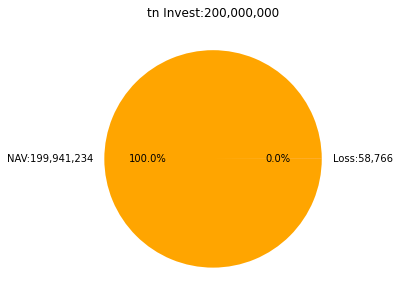

In [25]:
start_nav = user_df.loc[user_fee_anchor_date, f"{processing_user_name}_day_start"]
cashflow = user_df.loc[
    user_df.index > user_fee_anchor_date, f"{processing_user_name}_cf"
].sum()
total_invest = (
    start_nav - cashflow
)  # cashflow is negative for investing, positive for withdrawing
draw_utils.plot_profit_invest_pies([(processing_user_name, cum_profit, total_invest)])
